In [41]:
import pandas as pd
from itertools import chain
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  Utility.toolbox import find_repo_root, eval_pd_data_string_literal
root=find_repo_root()

In [42]:
df = pd.read_csv(f"{root}/Data/2020_trope_data/Scraped_Data/NER_parsed_reviews.csv")
df['reviews_extracted'] = df['reviews_extracted'].apply(ast.literal_eval)
print(len(df['reviews_extracted'].iloc[0]))
df = df.explode('reviews_extracted')
print(len(df['reviews_extracted'].iloc[0]))



96
254


In [43]:
df['reviews_extracted'] = df['reviews_extracted'].astype(str)

In [44]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample dataframe (replace with your actual data)
# # Assume the structure is like: df = pd.DataFrame({"movie_id": [1, 1, 1, 2, 2], "review": ["I love this movie", "Amazing plot", "Great acting", "Awesome movie", "Not bad"]})

# # Function to tokenize reviews into words
# def tokenize(review):
#     return set(review.lower().split())  # Use a set to get unique words

# # Initialize an empty list to store results
# new_words_rate = []

# # For each movie, calculate the new words rate for each review
# for i, movie_id in enumerate(df['IMDB_ID'].unique()):
#     print(i, " : ", movie_id)
#     # Filter reviews for the current movie
#     movie_reviews = df[df['IMDB_ID'] == movie_id]  # Assuming 'review_dates' column if needed

#     # Initialize sets for total and unique words so far
#     total_words_so_far = 0
#     unique_words_so_far = set()
    
#     for i, (_, row) in enumerate(movie_reviews.iterrows()):
#         # print(i, row['reviews_extracted'])
#         review_words = tokenize(row['reviews_extracted'])
        
#         # New words encountered in this review
#         new_words_in_this_review = review_words - unique_words_so_far
        
#         # Add to the total count of words
#         total_words_so_far += len(review_words)
        
#         # Update the set of unique words encountered so far
#         unique_words_so_far.update(review_words)
#         try:
#             rate = len(new_words_in_this_review) / len(review_words) 
#         except:
#             rate = 0
        
#         # Store
#         new_words_rate.append({
#             'movie_id': movie_id,
#             'review_count' : i,
#             'word_count' : len(review_words),
#             'genre': row['letterboxd_genres'], 
#             'review': row['reviews_extracted'],
#             'total_words_so_far': total_words_so_far,
#             'unique_words_so_far' : len(unique_words_so_far),
#             'new_words_in_this_review': len(new_words_in_this_review),
#             'new_words_rate': rate  # Rate of new words
#         })

# # Convert results to a DataFrame
# new_words_rate_df = pd.DataFrame(new_words_rate)

# new_words_rate_df.to_parquet(f"{root}/Data/liteweight/heaps_law_data.parquet")


In [45]:
new_words_rate_df = pd.read_parquet(f"{root}/Data/liteweight/heaps_law_data.parquet")
new_words_rate_df['genre'] = new_words_rate_df['genre'].apply(eval_pd_data_string_literal)


In [46]:
new_words_rate_df = new_words_rate_df.explode('genre')

In [47]:
new_words_rate_df[new_words_rate_df['review_count']==767]

,movie_id,review_count,word_count,genre,review,total_words_so_far,unique_words_so_far,new_words_in_this_review,new_words_rate
20440,tt2544766,767,1,History,荷兰确实没什么好电影，这部单国制作已经算是顶级上乘之作了。黄金时代的荷兰，电影剪辑很棒，最爱...,28912,1877,0,0.0
20440,tt2544766,767,1,Adventure,荷兰确实没什么好电影，这部单国制作已经算是顶级上乘之作了。黄金时代的荷兰，电影剪辑很棒，最爱...,28912,1877,0,0.0
20440,tt2544766,767,1,Drama,荷兰确实没什么好电影，这部单国制作已经算是顶级上乘之作了。黄金时代的荷兰，电影剪辑很棒，最爱...,28912,1877,0,0.0
21320,tt6306064,767,64,Thriller,American Animals was sold out and this was my ...,28448,1678,0,0.0
21320,tt6306064,767,64,Adventure,American Animals was sold out and this was my ...,28448,1678,0,0.0
...,...,...,...,...,...,...,...,...,...
906392,tt0105698,767,66,Action,Imagine being a short redneck dude and someone...,37920,2278,0,0.0
963460,tt0162650,767,59,Action,This legacy sequel of the originalShaft(and ye...,35776,2075,0,0.0
963460,tt0162650,767,59,Thriller,This legacy sequel of the originalShaft(and ye...,35776,2075,0,0.0
963460,tt0162650,767,59,Crime,This legacy sequel of the originalShaft(and ye...,35776,2075,0,0.0


In [48]:
grouped_df = new_words_rate_df.groupby(['genre', 'review_count'])[['total_words_so_far', 'new_words_in_this_review', 'unique_words_so_far', 'word_count', 'new_words_rate']].mean().reset_index()


In [49]:
grouped_df[grouped_df['genre']=='Adventure'].iloc[90:110]

,genre,review_count,total_words_so_far,new_words_in_this_review,unique_words_so_far,word_count,new_words_rate
858,Adventure,90,3669.430745,13.987190,1772.838271,37.944756,0.364772
859,Adventure,91,3708.688604,14.002408,1786.918138,38.049759,0.368315
860,Adventure,92,3748.106024,14.395984,1801.387149,39.265863,0.357175
861,Adventure,93,3787.450965,14.355305,1815.632637,39.245981,0.363623
862,Adventure,94,3826.442926,14.206592,1829.839228,38.991961,0.359887
863,Adventure,95,3867.587289,14.297667,1844.724055,39.653258,0.361999
864,Adventure,96,4113.611111,0.000000,1955.500000,30.166667,0.000000
865,Adventure,97,4154.444444,0.000000,1955.500000,40.833333,0.000000
866,Adventure,98,4196.166667,0.000000,1955.500000,41.722222,0.000000
867,Adventure,99,4232.888889,0.000000,1955.500000,36.722222,0.000000


In [50]:
grouped_df = grouped_df[grouped_df['review_count'] <=95]

In [51]:
grouped_df.head(100)

,genre,review_count,total_words_so_far,new_words_in_this_review,unique_words_so_far,word_count,new_words_rate
0,Action,0,40.242816,40.242816,40.242816,40.242816,1.000000
1,Action,1,82.149712,36.885797,77.138196,41.897313,0.880227
2,Action,2,125.999519,35.601153,112.778952,43.806824,0.810818
3,Action,3,167.569986,31.786436,144.614719,41.515152,0.760501
4,Action,4,209.509880,30.641446,175.209639,41.976867,0.721647
...,...,...,...,...,...,...,...
95,Action,95,4090.587310,14.670163,1946.674358,41.002098,0.359751
768,Adventure,0,36.810673,36.810673,36.810673,36.810673,1.000000
769,Adventure,1,75.163862,33.913680,70.750549,38.326993,0.880970
770,Adventure,2,114.857980,32.531479,103.231332,39.741581,0.817848


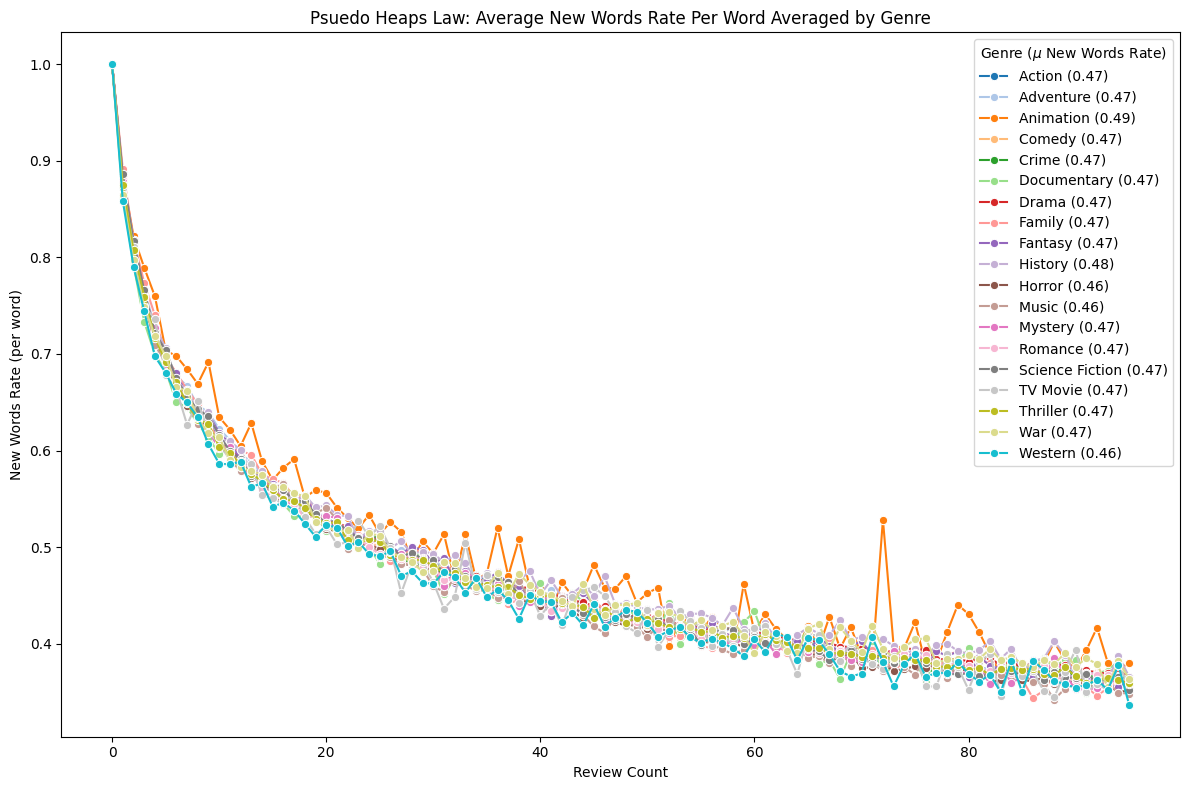

In [52]:

plt.figure(figsize=(12, 8))

sns.lineplot(
    data=grouped_df,
    x='review_count',
    y='new_words_rate',
    hue='genre',
    marker='o',
    palette='tab20'
)

handles, labels = plt.gca().get_legend_handles_labels()
words_rate_max = (
    grouped_df.groupby('genre')['new_words_rate'].mean().to_dict()
)

new_labels = [f"{label} ({words_rate_max[label] :.2f})" for label in labels]
plt.legend(handles=handles, labels=new_labels, title="Genre ($\\mu$ New Words Rate)")

plt.xlabel('Review Count')
plt.ylabel('New Words Rate (per word)')
plt.title('Psuedo Heaps Law: Average New Words Rate Per Word Averaged by Genre')
# plt.xlim(left=0, right=98)
plt.tight_layout()
plt.savefig(f"{root}/Figures/Main/new_words_rate")

plt.show()

In [53]:
grouped_df

,genre,review_count,total_words_so_far,new_words_in_this_review,unique_words_so_far,word_count,new_words_rate
0,Action,0,40.242816,40.242816,40.242816,40.242816,1.000000
1,Action,1,82.149712,36.885797,77.138196,41.897313,0.880227
2,Action,2,125.999519,35.601153,112.778952,43.806824,0.810818
3,Action,3,167.569986,31.786436,144.614719,41.515152,0.760501
4,Action,4,209.509880,30.641446,175.209639,41.976867,0.721647
...,...,...,...,...,...,...,...
11995,Western,91,4308.655602,15.842324,2048.804979,43.514523,0.357224
11996,Western,92,4353.647303,16.224066,2065.029046,44.991701,0.362331
11997,Western,93,4396.174274,15.136929,2080.165975,42.526971,0.352141
11998,Western,94,4439.356846,16.622407,2096.788382,43.182573,0.377579


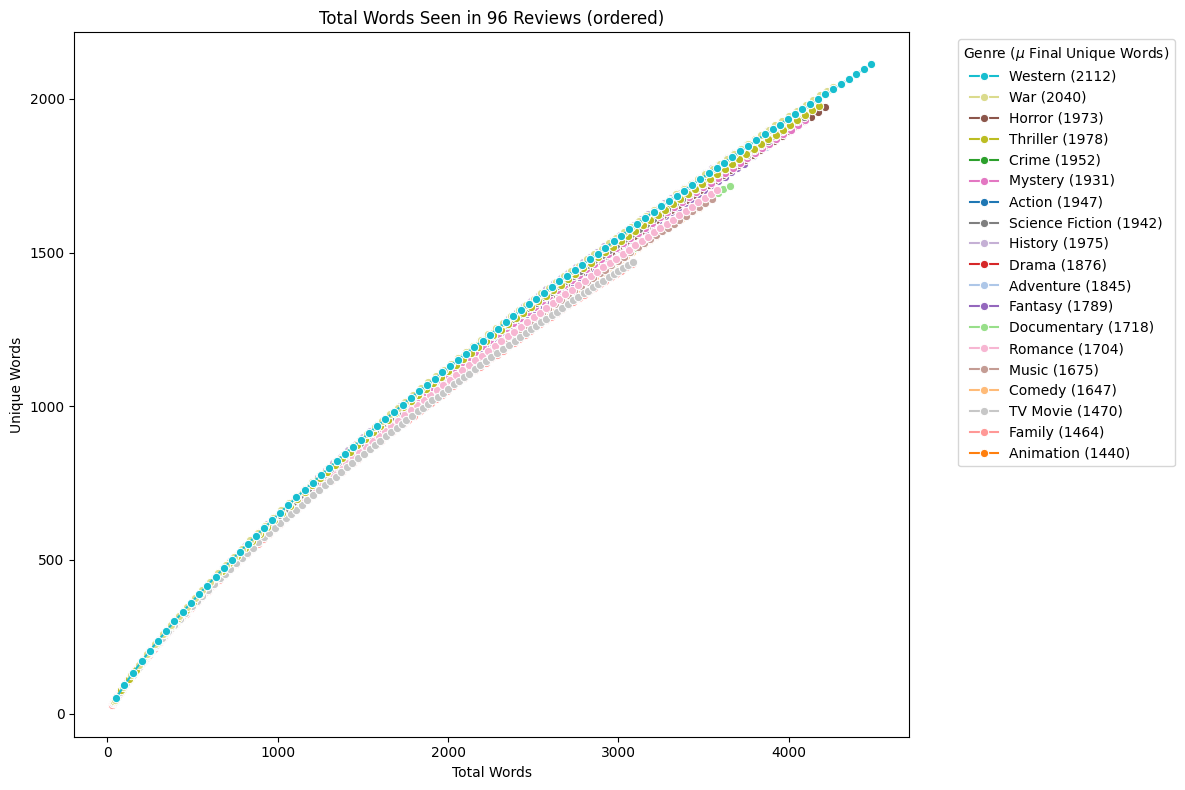

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=grouped_df,
    x='total_words_so_far',
    y='unique_words_so_far',
    hue='genre',
    marker='o',
    palette='tab20'
)

# Modify legend labels to include total unique words
handles, labels = plt.gca().get_legend_handles_labels()

# Calculate total unique words for each genre
unique_words_summary = (
    grouped_df.groupby('genre')['unique_words_so_far'].max().to_dict()
)

# Sort labels by the total words seen in the data
total_words_summary = grouped_df.groupby('genre')['total_words_so_far'].max().to_dict()
sorted_labels = sorted(labels, key=lambda label: total_words_summary[label], reverse=True)

# Update legend labels with sorted order and unique word counts
new_labels = [f"{label} ({unique_words_summary[label]:.0f})" for label in sorted_labels]
sorted_handles = [handles[labels.index(label)] for label in sorted_labels]
plt.legend(handles=sorted_handles, labels=new_labels, title="Genre ($\\mu$ Final Unique Words)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize axis labels and title
plt.ylabel('Unique Words')
plt.xlabel('Total Words')
plt.title('Total Words Seen in 96 Reviews (ordered)')
plt.tight_layout()
plt.savefig(f"{root}/Figures/Main/total_words")

plt.show()
